## Crime Dataset (Regression)
                                                                                                                                                                                                                                       

In [1]:
import pandas as pd
import numpy as np
from pandas import read_csv
import matplotlib.pyplot as plt
#%matplotlib inline

In [2]:
df=pd.read_csv('/content/crimedata.csv',sep=',',na_values='?', encoding='latin-1')
df.head()

,Êcommunityname,state,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
0,BerkeleyHeightstownship,NJ,39.0,5320.0,1,11980,3.10,1.37,91.78,6.50,...,14.0,114.85,138.0,1132.08,16.0,131.26,2.0,16.41,41.02,1394.59
1,Marpletownship,PA,45.0,47616.0,1,23123,2.82,0.80,95.57,3.44,...,57.0,242.37,376.0,1598.78,26.0,110.55,1.0,4.25,127.56,1955.95
2,Tigardcity,OR,NaN,NaN,1,29344,2.43,0.74,94.33,3.43,...,274.0,758.14,1797.0,4972.19,136.0,376.30,22.0,60.87,218.59,6167.51
3,Gloversvillecity,NY,35.0,29443.0,1,16656,2.40,1.70,97.35,0.50,...,225.0,1301.78,716.0,4142.56,47.0,271.93,NaN,NaN,306.64,NaN
4,Bemidjicity,MN,7.0,5068.0,1,11245,2.76,0.53,89.16,1.17,...,91.0,728.93,1060.0,8490.87,91.0,728.93,5.0,40.05,NaN,9988.79


In [3]:
df.dtypes

Êcommunityname          object
state                   object
countyCode             float64
communityCode          float64
fold                     int64
                        ...   
autoTheftPerPop        float64
arsons                 float64
arsonsPerPop           float64
ViolentCrimesPerPop    float64
nonViolPerPop          float64
Length: 147, dtype: object

In [4]:
print(df.shape)

(2215, 147)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2215 entries, 0 to 2214
Columns: 147 entries, Êcommunityname to nonViolPerPop
dtypes: float64(116), int64(29), object(2)
memory usage: 2.5+ MB


In [6]:
df.describe()

,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
count,994.000000,991.000000,2215.000000,2.215000e+03,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,...,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2124.000000,2124.000000,1994.000000,2118.000000
mean,65.587525,45209.251261,5.494357,5.311798e+04,2.707327,9.335102,83.979819,2.670203,7.950176,14.445837,...,761.236890,1033.430203,2137.629295,3372.979150,516.692586,473.965628,30.907721,32.153682,589.078922,4908.241804
std,117.831399,25425.861573,2.872924,2.046203e+05,0.334120,14.247156,16.419080,4.473843,14.589832,4.518623,...,3111.702756,763.354442,7600.573464,1901.316145,3258.164244,504.666026,180.125248,39.240900,614.784518,2739.708901
min,1.000000,70.000000,1.000000,1.000500e+04,1.600000,0.000000,2.680000,0.030000,0.120000,4.580000,...,2.000000,16.920000,10.000000,77.860000,1.000000,6.550000,0.000000,0.000000,0.000000,116.790000
25%,11.000000,22887.000000,3.000000,1.436600e+04,2.500000,0.860000,76.320000,0.620000,0.930000,12.250000,...,95.000000,511.690000,392.000000,2040.080000,30.000000,156.952500,1.000000,7.670000,161.700000,2918.070000
50%,27.000000,46925.000000,5.000000,2.279200e+04,2.660000,2.870000,90.350000,1.230000,2.180000,13.620000,...,205.000000,822.715000,747.000000,3079.510000,75.000000,302.355000,5.000000,21.080000,374.060000,4425.450000
75%,80.500000,65805.000000,8.000000,4.302400e+04,2.850000,11.145000,96.225000,2.670000,7.810000,15.360000,...,508.000000,1350.232500,1675.000000,4335.410000,232.500000,589.775000,16.000000,42.852500,794.400000,6229.280000
max,840.000000,94597.000000,10.000000,7.322564e+06,5.280000,96.670000,99.630000,57.460000,95.290000,54.400000,...,99207.000000,11881.020000,235132.000000,25910.550000,112464.000000,4968.590000,5119.000000,436.370000,4877.060000,27119.760000


In [7]:
df = df.drop(columns=['Êcommunityname', 'state','countyCode','communityCode','fold'])
df.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
0,11980,3.10,1.37,91.78,6.50,1.88,12.47,21.44,10.93,11.33,...,14.0,114.85,138.0,1132.08,16.0,131.26,2.0,16.41,41.02,1394.59
1,23123,2.82,0.80,95.57,3.44,0.85,11.01,21.30,10.48,17.18,...,57.0,242.37,376.0,1598.78,26.0,110.55,1.0,4.25,127.56,1955.95
2,29344,2.43,0.74,94.33,3.43,2.35,11.36,25.88,11.01,10.28,...,274.0,758.14,1797.0,4972.19,136.0,376.30,22.0,60.87,218.59,6167.51
3,16656,2.40,1.70,97.35,0.50,0.70,12.55,25.20,12.19,17.57,...,225.0,1301.78,716.0,4142.56,47.0,271.93,NaN,NaN,306.64,NaN
4,11245,2.76,0.53,89.16,1.17,0.52,24.46,40.53,28.69,12.65,...,91.0,728.93,1060.0,8490.87,91.0,728.93,5.0,40.05,NaN,9988.79


In [8]:
from pandas import DataFrame

df = df.replace('?', np.nan)
feat_miss = df.columns[df.isnull().any()]

In [9]:
from sklearn.impute import SimpleImputer
import numpy as np

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
for x in feat_miss:
  avg=df[x].mean()
  df[x]=df[x].fillna(avg)

In [10]:
df.shape

(2215, 142)

In [11]:
df.columns[df.isnull().any()]

Index([], dtype='object')

In [12]:
# Look at the features with missing values

df[feat_miss[0:13]].describe()

,OtherPerCap,LemasSwornFT,LemasSwFTPerPop,LemasSwFTFieldOps,LemasSwFTFieldPerPop,LemasTotalReq,LemasTotReqPerPop,PolicReqPerOffic,PolicPerPop,RacialMatchCommPol,PctPolicWhite,PctPolicBlack,PctPolicHisp
count,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2.215000e+03,2.215000e+03,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000
mean,9442.765131,499.198251,246.490962,432.559767,210.844781,2.524050e+05,1.206517e+05,523.658309,246.493586,85.499679,82.515831,9.263294,5.459767
std,7924.676433,660.866822,107.610924,587.070237,92.549928,2.709735e+05,5.825131e+04,120.989559,107.610628,4.300249,6.026156,4.331736,4.167886
min,0.000000,65.000000,29.400000,14.000000,19.210000,2.100000e+03,2.704800e+03,20.800000,29.400000,42.150000,1.600000,0.000000,0.000000
25%,5528.500000,499.198251,246.490962,432.559767,210.844781,2.524050e+05,1.206517e+05,523.658309,246.493586,85.499679,82.515831,9.263294,5.459767
50%,8187.000000,499.198251,246.490962,432.559767,210.844781,2.524050e+05,1.206517e+05,523.658309,246.493586,85.499679,82.515831,9.263294,5.459767
75%,11525.000000,499.198251,246.490962,432.559767,210.844781,2.524050e+05,1.206517e+05,523.658309,246.493586,85.499679,82.515831,9.263294,5.459767
max,137000.000000,25655.000000,3437.230000,22496.000000,3290.620000,8.328470e+06,1.926282e+06,2162.500000,3437.200000,100.000000,100.000000,67.310000,98.400000


In [13]:
df[feat_miss[13:23]].describe()

,PctPolicAsian,PctPolicMinor,OfficAssgnDrugUnits,NumKindsDrugsSeiz,PolicAveOTWorked,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,PolicBudgPerPop
count,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2.215000e+03,2215.000000,2215.000000,2.215000e+03
mean,0.681283,15.242245,26.288630,8.816327,119.114286,185.478134,3.217602e+07,87.130933,4.285714,1.535779e+05
std,0.670642,5.827340,39.625907,1.114783,36.353261,125.196470,4.341262e+07,4.067694,1.597480,7.980089e+04
min,0.000000,0.000000,0.000000,1.000000,0.000000,20.000000,2.380215e+06,10.850000,0.000000,1.526040e+04
25%,0.681283,15.242245,26.288630,8.816327,119.114286,185.478134,3.217602e+07,87.130933,4.285714,1.535779e+05
50%,0.681283,15.242245,26.288630,8.816327,119.114286,185.478134,3.217602e+07,87.130933,4.285714,1.535779e+05
75%,0.681283,15.242245,26.288630,8.816327,119.114286,185.478134,3.217602e+07,87.130933,4.285714,1.535779e+05
max,18.570000,98.400000,1773.000000,15.000000,634.700000,3187.000000,1.617293e+09,99.940000,10.000000,2.422367e+06


In [14]:
df.describe()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
count,2.215000e+03,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,...,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000
mean,5.311798e+04,2.707327,9.335102,83.979819,2.670203,7.950176,14.445837,27.644840,13.975142,11.836393,...,761.236890,1033.430203,2137.629295,3372.979150,516.692586,473.965628,30.907721,32.153682,589.078922,4908.241804
std,2.046203e+05,0.334120,14.247156,16.419080,4.473843,14.589832,4.518623,6.181517,5.970747,4.777565,...,3109.593841,762.837088,7595.422279,1900.027554,3255.956067,504.323995,176.384647,38.425998,583.294342,2679.020528
min,1.000500e+04,1.600000,0.000000,2.680000,0.030000,0.120000,4.580000,9.380000,4.640000,1.660000,...,2.000000,16.920000,10.000000,77.860000,1.000000,6.550000,0.000000,0.000000,0.000000,116.790000
25%,1.436600e+04,2.500000,0.860000,76.320000,0.620000,0.930000,12.250000,24.415000,11.320000,8.750000,...,95.000000,512.185000,392.500000,2040.740000,30.000000,157.060000,1.000000,7.985000,185.280000,2994.265000
50%,2.279200e+04,2.660000,2.870000,90.350000,1.230000,2.180000,13.620000,26.780000,12.540000,11.730000,...,205.000000,823.710000,748.000000,3081.630000,75.000000,303.200000,6.000000,22.380000,445.940000,4576.610000
75%,4.302400e+04,2.850000,11.145000,96.225000,2.670000,7.810000,15.360000,29.205000,14.345000,14.415000,...,511.500000,1348.670000,1676.500000,4334.675000,234.000000,589.225000,18.000000,41.435000,722.000000,6100.870000
max,7.322564e+06,5.280000,96.670000,99.630000,57.460000,95.290000,54.400000,70.510000,63.620000,52.770000,...,99207.000000,11881.020000,235132.000000,25910.550000,112464.000000,4968.590000,5119.000000,436.370000,4877.060000,27119.760000


**ViolentCrimesPerPop**: total number of violent crimes per 100K popuation (numeric - decimal) GOAL attribute (to be predicted)

The per capita violent crimes variable was calculated using population and the sum of crime variables considered violent crimes in the United States: murder, rape, robbery, and assault. There was apparently some controversy in some states concerning the counting of rapes. These resulted in missing values for rape, which resulted in incorrect values for per capita violent crime. These cities are not included in the dataset. Many of these omitted communities were from the midwestern USA.

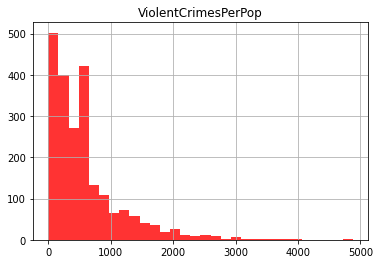

In [15]:
df.hist(column = ['ViolentCrimesPerPop'], bins = 30, color = 'red', alpha = 0.8)
plt.show()

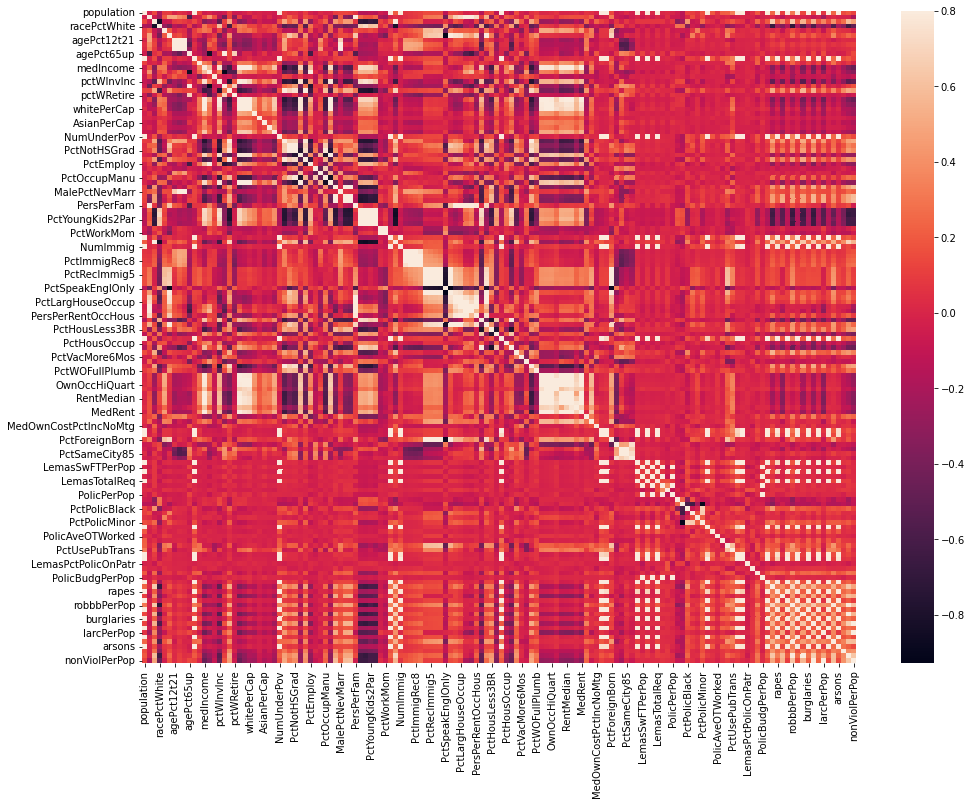

In [16]:
import seaborn as sns

corrmat = df.corr()
fig = plt.figure(figsize = (16, 12))

sns.heatmap(corrmat, vmax = 0.8)
plt.show()

In [17]:
pd.options.display.max_rows = 500

In [18]:
corrT = df.corr(method = 'pearson').round(4)
corrT = corrT.sort_values(by=['ViolentCrimesPerPop'])
CorrRelatn=corrT['ViolentCrimesPerPop']


In [19]:
#CorrRelatn[(CorrRelatn <0.2)].index
dropVar=CorrRelatn.loc[lambda x : (x > -0.2) & (x < 0.2)].index.tolist()

In [20]:
df=df.drop(dropVar,axis=1)

In [21]:
df.head()

,racepctblack,racePctWhite,racePctHisp,numbUrban,medIncome,pctWWage,pctWInvInc,pctWPubAsst,medFamInc,perCapInc,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
0,1.37,91.78,1.88,11980,75122,89.24,70.20,1.03,79584,29711,...,14.0,114.85,138.0,1132.08,16.0,131.26,2.000000,16.410000,41.020000,1394.590000
1,0.80,95.57,0.85,23123,47917,78.99,64.11,2.75,55323,20148,...,57.0,242.37,376.0,1598.78,26.0,110.55,1.000000,4.250000,127.560000,1955.950000
2,0.74,94.33,2.35,29344,35669,82.00,55.73,2.94,42112,16946,...,274.0,758.14,1797.0,4972.19,136.0,376.30,22.000000,60.870000,218.590000,6167.510000
3,1.70,97.35,0.70,0,20580,68.15,38.95,11.71,26501,10810,...,225.0,1301.78,716.0,4142.56,47.0,271.93,30.907721,32.153682,306.640000,4908.241804
4,0.53,89.16,0.52,0,17390,69.33,42.82,11.21,24018,8483,...,91.0,728.93,1060.0,8490.87,91.0,728.93,5.000000,40.050000,589.078922,9988.790000


In [22]:
corrT = df.corr(method = 'pearson').round(4)
corrT = corrT.sort_values(by=['ViolentCrimesPerPop'])
CorrRelatn=corrT['ViolentCrimesPerPop']
CorrRelatn.tail(10)

rapesPerPop            0.5799
racepctblack           0.5901
autoTheftPerPop        0.6014
nonViolPerPop          0.6289
murdPerPop             0.6354
burglPerPop            0.6716
PctKidsBornNeverMar    0.6883
robbbPerPop            0.7893
assaultPerPop          0.8549
ViolentCrimesPerPop    1.0000
Name: ViolentCrimesPerPop, dtype: float64

In [23]:
X=df.drop(columns=['ViolentCrimesPerPop']).values
y=df['ViolentCrimesPerPop'].values

from sklearn.model_selection import train_test_split

seed = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = seed)

print(X.shape)
print(y.shape)

(2215, 77)
(2215,)


In [24]:
from sklearn.preprocessing import StandardScaler

# Standardize features by removing the mean and scaling to unit variance

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# **Model Selection**

Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
reg = LinearRegression()
scores = cross_val_score(reg, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
print(scores)
scores.mean()
print(scores.mean())
reg.fit(X_train,y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

[-38980.41483128 -28612.50477809 -61415.85288612 -81504.19943291
 -53700.88229001]
-52842.77084368288


LinearRegression(normalize=False)

In [26]:
ypred=reg.predict(X_test)

In [27]:
my_pd=pd.DataFrame(data=[y_test,ypred]).T 
my_pd.columns=['y_test','ypred']
my_pd

,y_test,ypred
0,847.77,723.452583
1,2241.85,2026.111945
2,151.78,223.829447
3,1118.18,1068.192283
4,337.96,534.658017
...,...,...
660,417.93,591.735730
661,1035.05,1168.131664
662,36.91,-35.684077
663,69.94,72.241818


In [28]:
from sklearn.metrics import mean_squared_error #calculating MSE
testingerror=mean_squared_error(ypred,y_test)
testingerror

34866.0122025503

Support Vector Regression

In [29]:
from sklearn.svm import SVR
reg=SVR(kernel='linear')
scores = cross_val_score(reg, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
print(scores.mean())
reg.fit(X_train,y_train)

-56875.089362411374


SVR(kernel='linear')

In [30]:
ypred=reg.predict(X_test)

In [31]:
my_pd=pd.DataFrame(data=[y_test,ypred]).T
my_pd.columns=['y_test','ypred']
my_pd

,y_test,ypred
0,847.77,850.218026
1,2241.85,2200.995235
2,151.78,157.277589
3,1118.18,1105.397765
4,337.96,346.873917
...,...,...
660,417.93,426.705022
661,1035.05,1030.600952
662,36.91,47.731949
663,69.94,72.952930


In [32]:
from sklearn.metrics import mean_squared_error #calculating MSE
testingerror=mean_squared_error(ypred,y_test)
testingerror

42621.45197779192

Polynomial Regression

In [33]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_validate
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)
lin2=LinearRegression()
scores = cross_validate(lin2, X_poly,y_train,scoring='neg_mean_squared_error', cv=5)
print(scores['test_score'])
print(scores['test_score'].mean())


lin2.fit(X_poly,y_train)

[-175061.70649367 -713548.53014051 -201796.41700136 -178943.85901668
 -106169.28861901]
-275103.9602542458


LinearRegression()

In [34]:
X_testpoly = poly_reg.transform(X_test)

In [35]:
ypred=lin2.predict(X_testpoly)

In [36]:
my_pd=pd.DataFrame(data=[y_test,ypred]).T 
my_pd.columns=['y_test','ypred']
my_pd

,y_test,ypred
0,847.77,949.642093
1,2241.85,2493.462188
2,151.78,83.657825
3,1118.18,1188.215515
4,337.96,164.397105
...,...,...
660,417.93,-37.916121
661,1035.05,1175.745153
662,36.91,209.427337
663,69.94,66.460443


In [37]:
from sklearn.metrics import mean_squared_error #calculating MSE
testingerror=mean_squared_error(ypred,y_test)
testingerror

89228.23073483237